In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import xarray as xr
import numpy as np
import pandas as pd
import glob
import calendar
import seaborn as sns
import seaborn_image as isns

In [2]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [3]:
plt.style.use('seaborn-pastel')
sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [4]:
data_baseline = xr.open_mfdataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/FCO2/fco2_baseline_7.0_cropped.nc')

In [5]:
data_oae = xr.open_mfdataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/FCO2/fco2_OAE_7.0_cropped.nc')

In [6]:
data_baseline = data_baseline.where(data_baseline)
data_oae = data_oae.where(data_oae)

In [7]:
dataframe_base = data_baseline.sel(time_counter=slice('2090', '2100'))

In [8]:
dataframe_oae = data_oae.sel(time_counter=slice('2090', '2100'))

### Averaged Annual Amplitude of FCO2 for the last ten years without OAE

In [9]:
fco2_max_base = dataframe_base.resample(time_counter='AS').max('time_counter')
fco2_max_base = dataframe_base.groupby('time_counter.year').max('time_counter')

In [10]:
fco2_min_base = dataframe_base.resample(time_counter='AS').min('time_counter')
fco2_min_base = dataframe_base.groupby('time_counter.year').min('time_counter')

In [11]:
fco2_amplitude_base = fco2_max_base['fco2'] - fco2_min_base['fco2']

In [12]:
fco2_amplitude_base = fco2_amplitude_base.to_dataset()

In [13]:
fco2_amplitude_base_map = fco2_amplitude_base.fco2.mean(dim=('year'))

In [14]:
fco2_amplitude_base_map = fco2_amplitude_base_map.to_dataset()

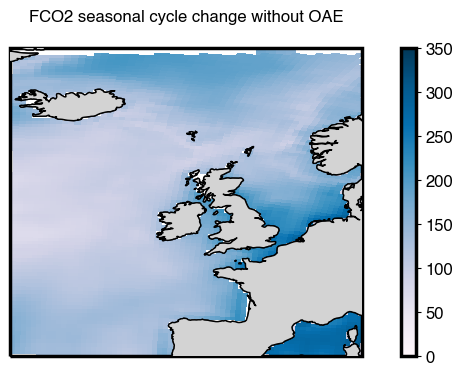

In [17]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

fco2_amplitude_base_map.fco2.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=False, vmin = 0, vmax = 350, cmap='PuBu'
)
ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

im = plt.imshow(fco2_amplitude_base_map.fco2, cmap="PuBu", vmin = 0, vmax = 350)
cb = plt.colorbar(im, shrink=1)

for t in cb.ax.get_yticklabels():
     t.set_fontsize(12)

plt.title('FCO2 seasonal cycle change without OAE', fontname="Helvetica", fontsize=12, y=1.06)
plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP3_7.0/FCO2/figs/fco2_amplitude_baseline.png')

### Averaged Annual Amplitude of FCO2 for the last ten years with OAE

In [18]:
fco2_max_oae = dataframe_oae.resample(time_counter='AS').max('time_counter')
fco2_max_oae = dataframe_oae.groupby('time_counter.year').max('time_counter')

In [19]:
fco2_min_oae = dataframe_oae.resample(time_counter='AS').min('time_counter')
fco2_min_oae = dataframe_oae.groupby('time_counter.year').min('time_counter')

In [20]:
fco2_amplitude_oae = fco2_max_oae['fco2'] - fco2_min_oae['fco2']

In [21]:
fco2_amplitude_oae = fco2_amplitude_oae.to_dataset()

In [22]:
fco2_amplitude_oae_map = fco2_amplitude_oae.fco2.mean(dim=('year'))

In [23]:
fco2_amplitude_oae_map = fco2_amplitude_oae_map.to_dataset()

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/dask/array/reductions.py:569: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/dask/array/reductions.py:540: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)


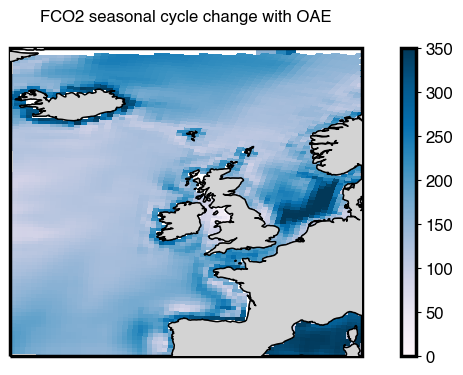

In [24]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

fco2_amplitude_oae_map.fco2.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=False, vmin = 0, vmax = 300, cmap='PuBu'
)
ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

im = plt.imshow(fco2_amplitude_oae_map.fco2, cmap="PuBu", vmin = 0, vmax = 350)
cb = plt.colorbar(im, shrink=1)

for t in cb.ax.get_yticklabels():
     t.set_fontsize(12)
        
plt.title('FCO2 seasonal cycle change with OAE', fontname="Helvetica", fontsize=12, y=1.06)
plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP3_7.0/FCO2/figs/fco2_amplitude_oae.png')

### Δ FCO2 between Baseline and OAE scenario

In [25]:
fco2_amplitude_change = fco2_amplitude_oae - fco2_amplitude_base

In [26]:
fco2_amplitude_change_map = fco2_amplitude_change.fco2.mean(dim=('year'))

In [27]:
fco2_amplitude_change_map = fco2_amplitude_change_map.to_dataset()

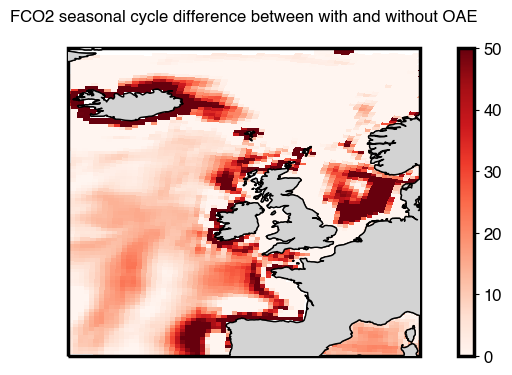

In [38]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

fco2_amplitude_change_map.fco2.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=False, vmin = 0, vmax = 50, cmap="Reds"
)
ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

im = plt.imshow(fco2_amplitude_change_map.fco2, cmap="Reds", vmin = 0, vmax = 50)
cb = plt.colorbar(im, shrink=1)

for t in cb.ax.get_yticklabels():
     t.set_fontsize(12)

plt.title('FCO2 seasonal cycle difference between with and without OAE', fontname="Helvetica", fontsize=12, y=1.06)
plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP3_7.0/FCO2/figs/fco2_amplitude_Δ.png')

### Averaged Annual Amplitude of FCO2 over time

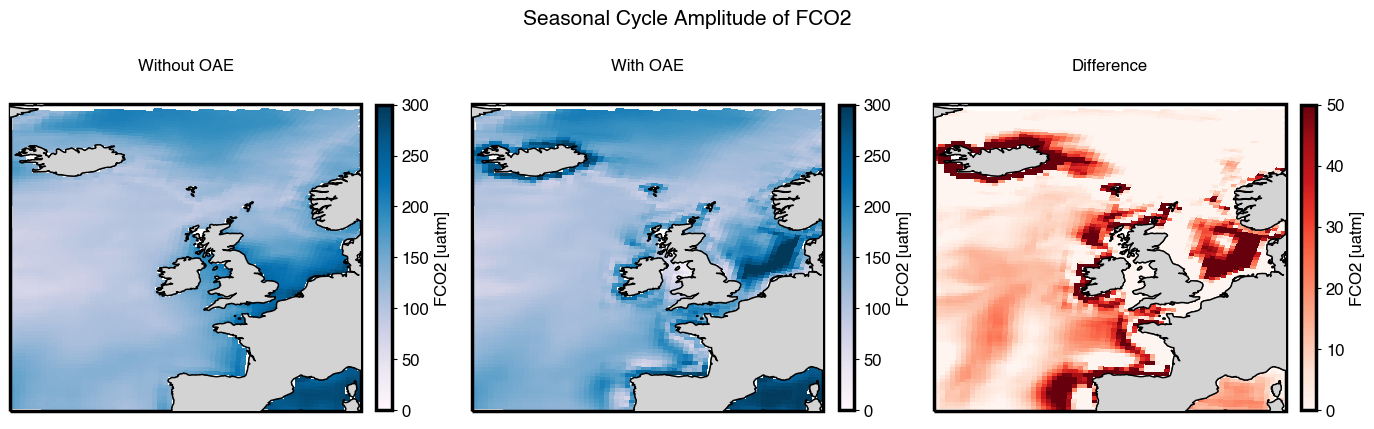

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(14, 8))

im1 = fco2_amplitude_base_map.fco2.plot.pcolormesh(
        ax=ax1, x="nav_lon", y="nav_lat",
        vmin=0,
        vmax=300,
        cmap="PuBu",
        add_colorbar=False
    )
    
im2 = fco2_amplitude_oae_map.fco2.plot.pcolormesh(
        ax=ax2, x="nav_lon", y="nav_lat",
        vmin=0,
        vmax=300,
        cmap="PuBu",
        add_colorbar=False
    )
    
im3 = fco2_amplitude_change_map.fco2.plot.pcolormesh( 
        ax=ax3, x="nav_lon", y="nav_lat",
        vmin=0,
        vmax=50,
        cmap="Reds", 
        add_colorbar=False
    )
    
ax1.set_title("Without OAE", fontsize=12, y=1.08)
ax2.set_title("With OAE", fontsize=12, y=1.08)
ax3.set_title("Difference", fontsize=12, y=1.08)    
    
ax1.coastlines()
ax1.set_extent([-25, 10, 40, 70])  
ax1.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

ax2.coastlines()
ax2.set_extent([-25, 10, 40, 70]) 
ax2.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

ax3.coastlines()
ax3.set_extent([-25, 10, 40, 70])
ax3.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

cb1= plt.colorbar(im1,ax=ax1, fraction=0.040, pad=0.04)
cb1.set_label('FCO2 [uatm]', fontsize=12)

cb2= plt.colorbar(im2,ax=ax2, fraction=0.040, pad=0.04)
cb2.set_label('FCO2 [uatm]', fontsize=12)

cb3= plt.colorbar(im3,ax=ax3, fraction=0.040, pad=0.04)
cb3.set_label('FCO2 [uatm]', fontsize=12)

for t in cb1.ax.get_yticklabels():
     t.set_fontsize(12)
        
for t in cb2.ax.get_yticklabels():
     t.set_fontsize(12)
        
for t in cb3.ax.get_yticklabels():
     t.set_fontsize(12)

plt.tight_layout()
fig.suptitle("", fontsize=17, y=1.08)

pass

fig.suptitle('Seasonal Cycle Amplitude of FCO2', fontname='helvetica', fontsize=15, y=0.81)
plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP3_7.0/FCO2/figs/FCO2_seasonal_cycle.png')

In [27]:
dataframe_base_map = data_baseline.sel(time_counter=slice('2025', '2100'))

In [28]:
dataframe_oae_map = data_oae.sel(time_counter=slice('2025', '2100'))

In [29]:
fco2_max_base_map = dataframe_base_map.resample(time_counter='AS').max('time_counter')
fco2_max_base_map = dataframe_base_map.groupby('time_counter.year').max('time_counter')

In [30]:
fco2_min_base_map = dataframe_base_map.resample(time_counter='AS').min('time_counter')
fco2_min_base_map = dataframe_base_map.groupby('time_counter.year').min('time_counter')

In [31]:
fco2_amplitude_base_map = fco2_max_base_map['fco2'] - fco2_min_base_map['fco2']

In [32]:
fco2_amplitude_base_map = fco2_amplitude_base_map.to_dataset()

In [33]:
fco2_max_oae_map = dataframe_oae_map.resample(time_counter='AS').max('time_counter')
fco2_max_oae_map = dataframe_oae_map.groupby('time_counter.year').max('time_counter')

In [34]:
fco2_min_oae_map = dataframe_oae_map.resample(time_counter='AS').min('time_counter')
fco2_min_oae_map = dataframe_oae_map.groupby('time_counter.year').min('time_counter')

In [35]:
fco2_amplitude_oae_map = fco2_max_oae_map['fco2'] - fco2_min_oae_map['fco2']

In [36]:
fco2_amplitude_oae_map = fco2_amplitude_oae_map.to_dataset()

In [37]:
fco2_amplitude_base_average = (fco2_amplitude_base_map.fco2.mean(dim=('y', 'x'))).to_dataset()

In [38]:
fco2_amplitude_oae_average = (fco2_amplitude_oae_map.fco2.mean(dim=('y', 'x'))).to_dataset()

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/dask/array/reductions.py:569: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/dask/array/reductions.py:540: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)


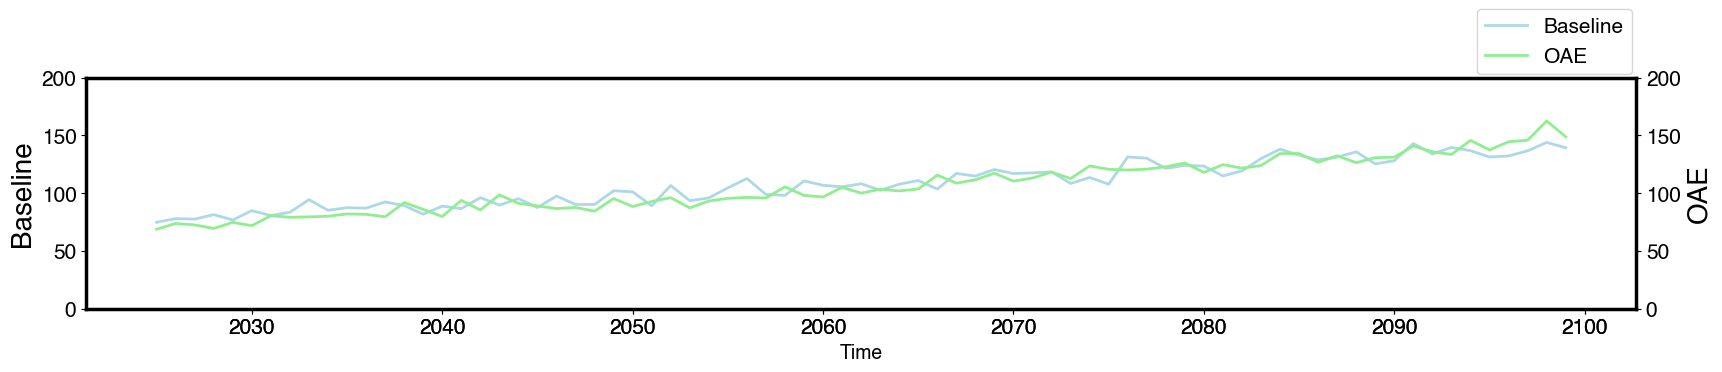

In [39]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(fco2_amplitude_base_average.year, fco2_amplitude_base_average.fco2, linewidth=2, color="lightblue", label = 'Baseline')
ax.set_ylabel('Baseline')
ax.set_ylim(0,200)

ax2.plot(fco2_amplitude_oae_average.year, fco2_amplitude_oae_average.fco2, linewidth=2, color="lightgreen", label = 'OAE')
ax2.set_ylabel('OAE')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylim(0,200)

plt.xlabel("Time", fontsize=14)

plt.title('', fontname="Helvetica", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.815, 1), loc='center left')
plt.show()